# Lab 3 - **Music Note Analysis/Synthesis** Part 2

___

**Lab Overview**

In the previous lab, you summed sinusoids to synthesize an approximate reconstruction of a guitar note. In this lab, you'll refine the reconstruction by taking into account the shape of the signal in time-domain.
___

**1.** First, run this code to mount google drive so that you can access the class files.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Next, run this code to import the libraries you'll be using.

In [ ]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt # we will be doing some filtering

Run the code below which loads the original guitar audio from Lab 2 and its sampling rate. Take another listen.

In [ ]:
load_path = "/content/drive/MyDrive/ECES-434 Sessions/Lab 3/audio/"
guitar, fs = librosa.load(load_path + "guitar.wav", sr=None)

ipd.Audio(guitar, rate=fs)


Now run this to load the synth reconstruction you made by summing sinusoids. As a reminder, you determined the fundamental frequency of the guitar note by locating the harmonic spikes in the signal. The weights assgined to each of these frequencies was simply the output of the Discrete Fourier Transform (DFT).

Take another listen to the synth reconstruction.

In [ ]:
synth, fs = librosa.load(load_path + "synth.wav", sr=None)
ipd.Audio(synth, rate=fs)

**2.** In the previous lab, the guitar note synthesis focused on analyzing the signal in the frequency domain. Now you will look at the signal in the time domain to improve the synthesis.

Plot the guitar and synth waveforms in the time domain, with seconds along the x-axis. Use subplots to show the two waveforms as two rows. Title the plots appropriately.

*Hint: among other functions, you will want to use plt.subplot and plt.title*

In [ ]:
fig = plt.figure(figsize=(20,8))  # make the figure nice and big

# your code here

**3.** Notice how the general shape of the waveform in the time domain is very different between these signals. This overall waveform shape is called an *amplitude envelope*. 

Describe in words the differences you see between the two waveforms' amplitude envelopes and how these contribute to their sounds.

*Your response here*

**4.** To be a more accurate reconstruction, it would help if the synthesized note had the same amplitude envelope. Let's extract the envelope from the original guitar note and apply it to the synth.

To compute the envelope, first, we need to half wave rectify the guitar signal. Full wave rectifying is essentially taking the absolute value of a signal. For half wave rectifying, we take the negatvie values and set them to zero. See the figure below which demonstrates this with a sine wave.

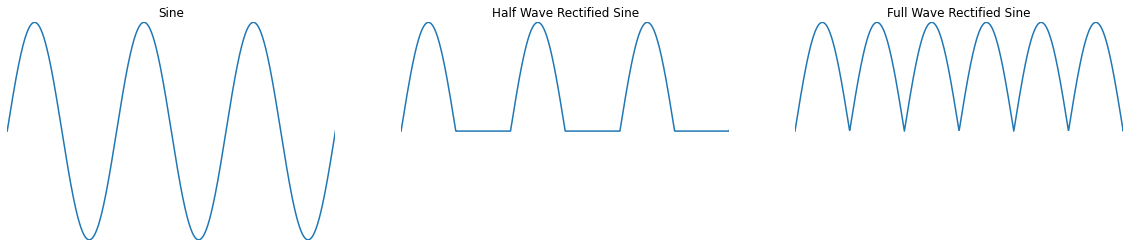

Compute a half wave rectified version of the original guitar signal and store it in the guitar_hwr variable below. Plot this new signal. Set the figure size so the figure is large enough to study.

*Hint: you may want to use the np.where function.*

In [ ]:
# your code here
guitar_hwr = 

**5.** Next, your task is to take this new half wave rectified signal and zero out the noise before and after the note. Determine a threshold, and set every value below this threshold equal to zero. You want to retain just the main shape of the note, not the trailing noise on the ends. Store the resulting signal in the guitar_hwr_cleaned variable below. Plot this new signal in a large figure.

In [ ]:
# your code here
threshold = 
guitar_hwr_cleaned = 

What threshold did you decide on?

*Your response here*

**6.** To obtain the amplitude envelope, you will need to smooth this cleaned, rectified signal. A low pass filter will do the trick. This will get rid of the fine detail in the signal and provide a smoother version, one that will hopefully capture the envelope of the signal. 

A type of low pass filter called a butterworth filter is implemented below. Your task is to determine an appropriate cutoff frequency in Hz. Try different values for the cutoff frequency and observe how the plot of the filtered signal changes. Your goal is to get the amplitude envelope in orange to smoothly hug the top of the guitar note waveform as closely as possible.

In [ ]:
# enter a cutoff frequency below (in Hz)
cutoff =

def butter_lowpass_filter(data, cutoff):
    normal_cutoff = cutoff / (0.5 * fs) 
    b, a = butter(4, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

envelope = librosa.util.normalize(butter_lowpass_filter(guitar_hwr_cleaned, cutoff))

fig = plt.figure(figsize=(20,4))

plt.plot(guitar)
plt.plot(envelope)

What cutoff frequency did you decide on?


*Your response here*

**7.** Let's see how well this envelope can shape the waveform of the synth note. Multiply the envelope by the synth and store this new signal in the synth_updated variable below. Using large subplots to display the two figures as rows, plot the waveforms for the guitar note and the updated synth. 

In [ ]:
# your code here
synth_updated = 

**8.** Listen to this updated synth sound. How does it sound compared to the starting synth sound? How does it sound compared to the original guitar note? Write a short response below. 

In [ ]:
ipd.Audio(synth_updated, rate=fs)

*Your response here*

**9. To Submit:** Use the file menu in Colab to locate this notebook file in your Google Drive. Right click the file name and click share. Share it with wiggins@excitecenter.org. Check with the TA to make sure the submission is received.

___

END OF LAB